# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [297]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [298]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [299]:
#Seu código aqui
df.dtypes

Valor_Aluguel       int64
Valor_Condominio    int64
Metragem            int64
N_Quartos           int64
N_banheiros         int64
N_Suites            int64
N_Vagas             int64
dtype: object

In [300]:
df['Valor_Aluguel'] = df['Valor_Aluguel'].astype(float)
df['Valor_Condominio'] = df['Valor_Condominio'].astype(float)
df['Metragem'] = df['Metragem'].astype(float)

In [301]:
print(f'Tipagem:\n {df.dtypes}')

Tipagem:
 Valor_Aluguel       float64
Valor_Condominio    float64
Metragem            float64
N_Quartos             int64
N_banheiros           int64
N_Suites              int64
N_Vagas               int64
dtype: object


In [302]:
((df == 0).sum() / len(df)) * 100

Valor_Aluguel        0.000000
Valor_Condominio     8.857421
Metragem             0.000000
N_Quartos            0.000000
N_banheiros          0.000000
N_Suites            23.809524
N_Vagas              4.081633
dtype: float64

In [303]:
(df.isnull().sum() / len(df)) * 100

Valor_Aluguel       0.0
Valor_Condominio    0.0
Metragem            0.0
N_Quartos           0.0
N_banheiros         0.0
N_Suites            0.0
N_Vagas             0.0
dtype: float64

## Verificado que não há dados faltantes no dataset.

# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

In [304]:
#Seu código aqui
df.describe().round(2)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.00,7203.00,7203.00,7203.00,7203.00,7203.00,7203.00
mean,2966.60,811.54,88.51,2.30,2.10,1.02,1.44
std,2948.72,796.56,61.57,0.83,0.98,0.87,0.87
min,480.00,0.00,30.00,1.00,1.00,0.00,0.00
25%,1350.00,395.00,52.00,2.00,2.00,1.00,1.00
50%,2000.00,592.00,67.00,2.00,2.00,1.00,1.00
75%,3200.00,980.00,100.00,3.00,2.00,1.00,2.00
max,25000.00,9500.00,880.00,10.00,8.00,5.00,9.00


## As variáveis Valor_Aluguel, Valor_Condominio e Metragem são as que precisam de atenção, já que a média e a mediana estão bem distantes e o valor máximo delas é muito alto. Inclusive o valor de 75% dos dados está muito longe, muito abaixo, do valor maximo de todas as três variáveis. Por isso será necessário verificar com mais atenção se podemos encontrar outiliers nelas.

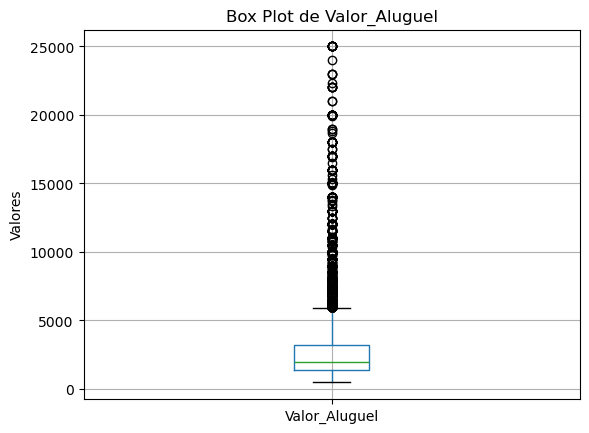

In [305]:
df.boxplot(column='Valor_Aluguel')
plt.title('Box Plot de Valor_Aluguel')
plt.ylabel('Valores')
plt.show()

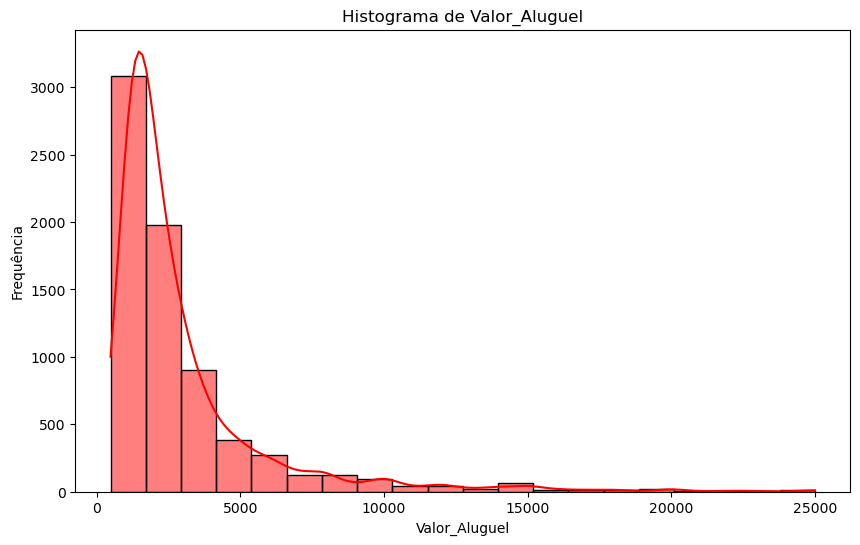

In [306]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Valor_Aluguel', bins=20, kde=True, color='red')
plt.title('Histograma de Valor_Aluguel')
plt.xlabel('Valor_Aluguel')
plt.ylabel('Frequência')
plt.show()

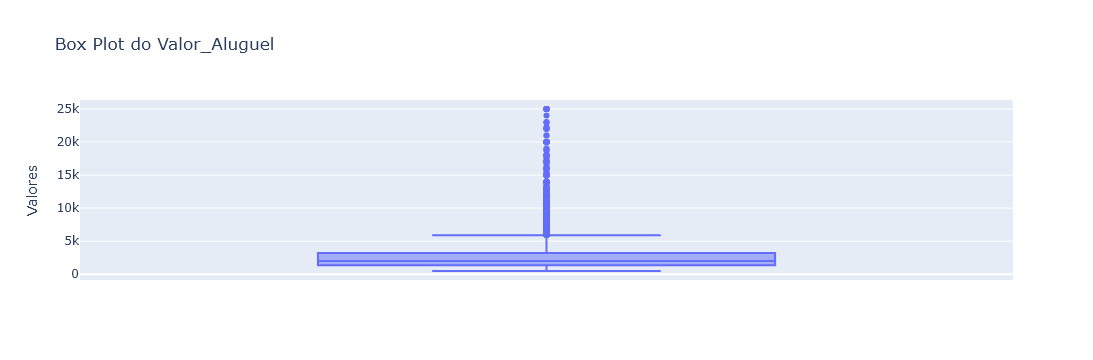

In [307]:
import plotly.express as px

fig = px.box(df, y='Valor_Aluguel', title='Box Plot do Valor_Aluguel', labels={'Valor_Aluguel': 'Valores'})
fig.show()

In [308]:
df[df['Valor_Aluguel'] > 5900]

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
6454,5990.0,1188.0,164.0,3,5,3,3
6455,5999.0,1400.0,175.0,4,4,1,2
6456,6000.0,800.0,150.0,3,4,3,2
6457,6000.0,0.0,152.0,2,2,1,1
6458,6000.0,1100.0,43.0,1,2,1,1
...,...,...,...,...,...,...,...
7198,25000.0,7500.0,627.0,4,5,4,6
7199,25000.0,4600.0,364.0,4,2,1,0
7200,25000.0,3700.0,266.0,3,4,3,7
7201,25000.0,6000.0,600.0,4,5,4,8


In [309]:
print("Porcentagem de registros onde 'Valor_Aluguel' > 5900:",
      (len(df[df['Valor_Aluguel'] > 5900]) / len(df)) * 100)
#E agora mantenho ou removo os outliers?? Prefiro manter mas vou esperar a resposta do tutor.

Porcentagem de registros onde 'Valor_Aluguel' > 5900: 10.398445092322643


## Foi verificado que os valores altos de alugueis fazem sentido e não se configura erros de digitação, por isso não faz sentido remover ou alterar esses dados. Então antes de separar as bases para aplicar o modelo, irei aplicar um log na variavel afim de diminuir o impacto dos outiliers sem perder informações.

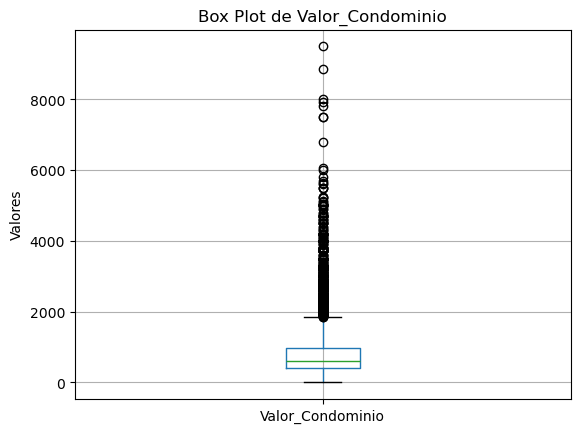

In [310]:
df.boxplot(column='Valor_Condominio')
plt.title('Box Plot de Valor_Condominio')
plt.ylabel('Valores')
plt.show()

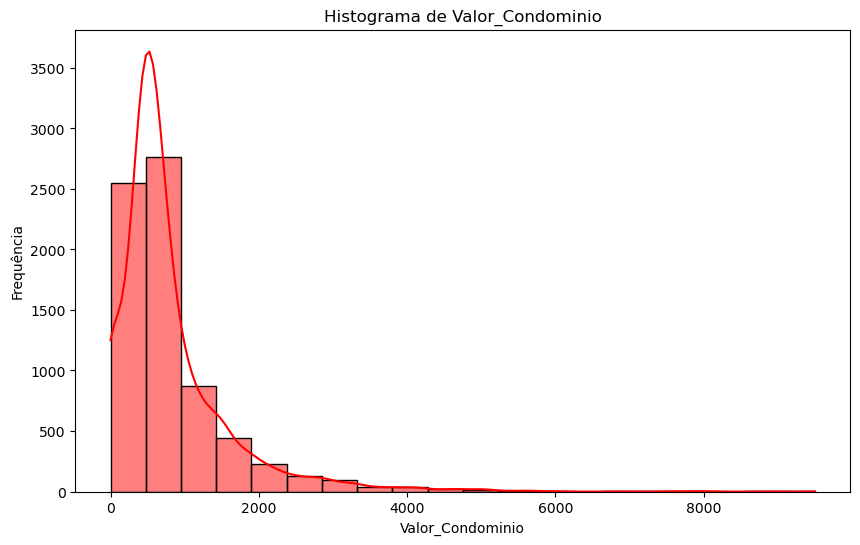

In [311]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Valor_Condominio', bins=20, kde=True, color='red')
plt.title('Histograma de Valor_Condominio')
plt.xlabel('Valor_Condominio')
plt.ylabel('Frequência')
plt.show()

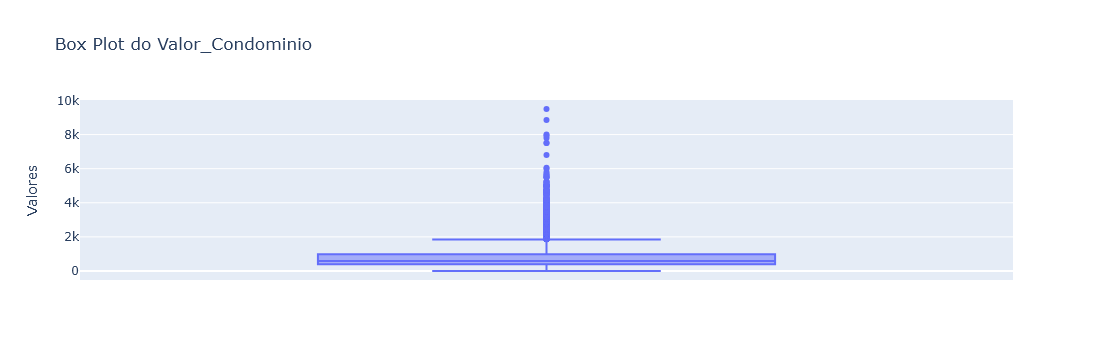

In [312]:
fig = px.box(df, y='Valor_Condominio', title='Box Plot do Valor_Condominio', labels={'Valor_Condominio': 'Valores'})
fig.show()

In [313]:
print("Porcentagem de registros onde 'Valor_Condominio' > 1854:",
      (len(df[df['Valor_Condominio'] > 1854]) / len(df)) * 100)

Porcentagem de registros onde 'Valor_Condominio' > 1854: 8.135499097598222


In [314]:
df[df['Valor_Condominio'] > 1854]

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
1649,1300.0,2435.0,208.0,4,3,2,3
2083,1400.0,1966.0,30.0,1,1,0,1
2156,1500.0,2893.0,230.0,3,2,1,2
2492,1500.0,2893.0,230.0,3,2,1,2
2753,1600.0,1900.0,30.0,1,1,0,1
...,...,...,...,...,...,...,...
7197,25000.0,5636.0,327.0,4,3,2,3
7198,25000.0,7500.0,627.0,4,5,4,6
7199,25000.0,4600.0,364.0,4,2,1,0
7200,25000.0,3700.0,266.0,3,4,3,7


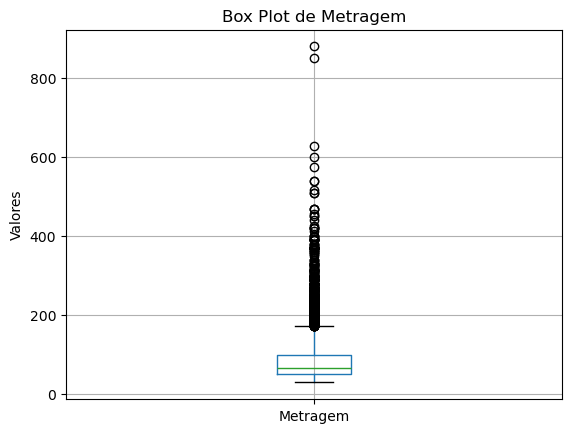

In [315]:
df.boxplot(column='Metragem')
plt.title('Box Plot de Metragem')
plt.ylabel('Valores')
plt.show()

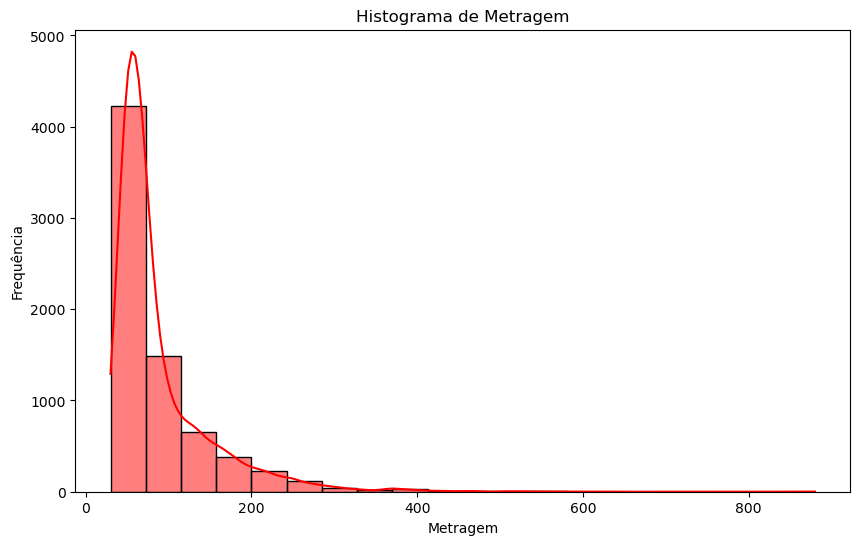

In [316]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Metragem', bins=20, kde=True, color='red')
plt.title('Histograma de Metragem')
plt.xlabel('Metragem')
plt.ylabel('Frequência')
plt.show()

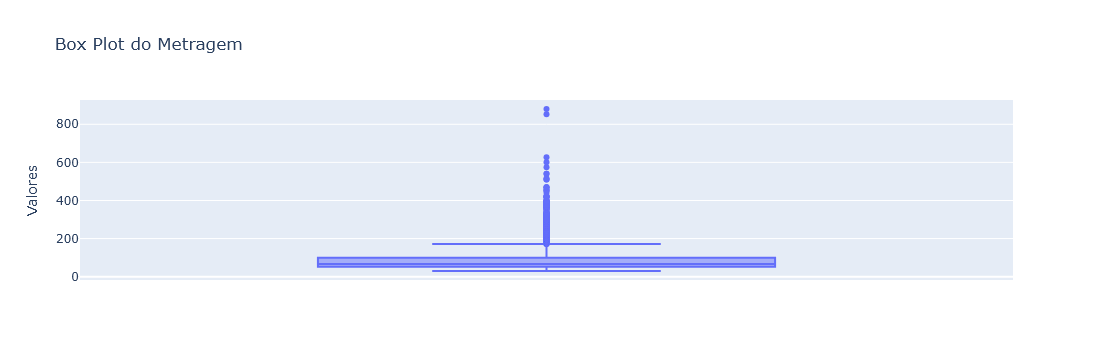

In [317]:
fig = px.box(df, y='Metragem', title='Box Plot do Metragem', labels={'Metragem': 'Valores'})
fig.show()

In [318]:
print("Porcentagem de registros onde 'Metragem' > 172:",
      (len(df[df['Metragem'] > 172]) / len(df)) * 100)

Porcentagem de registros onde 'Metragem' > 172: 8.982368457587118


In [319]:
df[df['Metragem'] == 30][['Metragem','N_Quartos','N_banheiros','Valor_Condominio','Valor_Aluguel']]

,Metragem,N_Quartos,N_banheiros,Valor_Condominio,Valor_Aluguel
4,30.0,1,1,0.0,500.0
26,30.0,2,2,0.0,650.0
30,30.0,2,1,100.0,650.0
35,30.0,1,2,0.0,700.0
62,30.0,1,1,80.0,700.0
113,30.0,1,2,60.0,790.0
153,30.0,1,1,0.0,800.0
211,30.0,1,2,80.0,850.0
325,30.0,1,2,190.0,905.0
326,30.0,1,1,169.0,905.0


In [320]:
erros = df[(df['Metragem'] < 40) & (df['N_Quartos'] > 2)]
print(erros)

Empty DataFrame
Columns: [Valor_Aluguel, Valor_Condominio, Metragem, N_Quartos, N_banheiros, N_Suites, N_Vagas]
Index: []


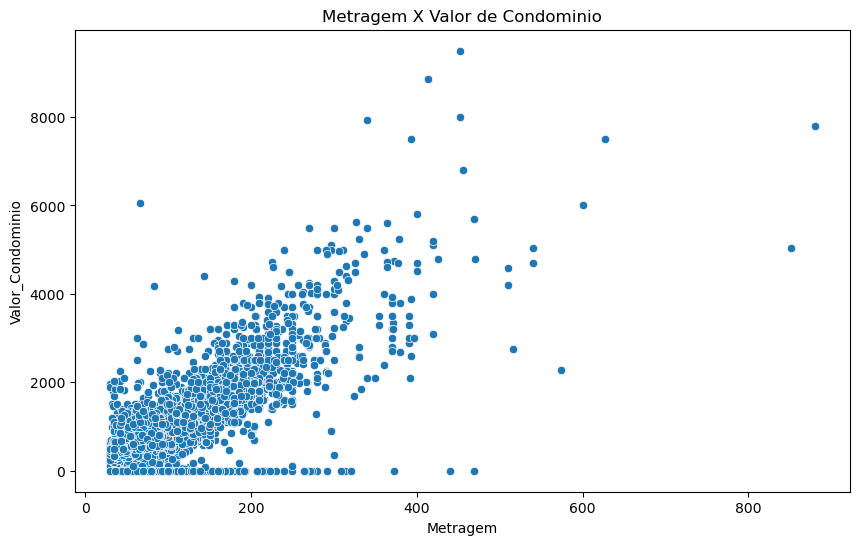

In [321]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Metragem', y='Valor_Condominio', data=df)
plt.title('Metragem X Valor de Condominio')
plt.xlabel('Metragem')
plt.ylabel('Valor_Condominio')
plt.show()


In [322]:
# Função para validar plausibilidade
def validar_imovel(row):
    # Regras simples de plausibilidade
    if row['Metragem'] < 40 and row['N_Quartos'] > 1:
        return "Suspeito: metragem muito baixa para vários quartos"
    if row['Metragem'] < 40 and row['N_banheiros'] > 1:
        return "Suspeito: metragem muito baixa para vários banheiros"
    return "OK"

# Aplicar a função ao dataset
df['Validacao'] = df.apply(validar_imovel, axis=1)

# Filtrar registros suspeitos
suspeitos = df[df['Validacao'] != "OK"]
print(suspeitos[['Metragem','N_Quartos','N_banheiros','Valor_Condominio','Validacao']])
print(f'Porcentagem de registros supeitos: {len(suspeitos)/len(df)}')



      Metragem  N_Quartos  N_banheiros  Valor_Condominio  \
11        35.0          1            2             600.0   
14        38.0          1            2              25.0   
24        38.0          1            2               0.0   
26        30.0          2            2               0.0   
30        30.0          2            1             100.0   
...        ...        ...          ...               ...   
5965      37.0          1            2            1044.0   
6159      36.0          1            2             650.0   
6225      30.0          1            2               0.0   
6375      36.0          1            2            2000.0   
6603      35.0          1            2             500.0   

                                              Validacao  
11    Suspeito: metragem muito baixa para vários ban...  
14    Suspeito: metragem muito baixa para vários ban...  
24    Suspeito: metragem muito baixa para vários ban...  
26    Suspeito: metragem muito baixa para vário

### Para detectar erros de digitação com mais clareza, pedi para o copilot me trazer um conjunto de padrões típicos dos mercado imobiliário brasileiro. Isso irá me ajudar a detectar erros de digitação nos dados e trata-los de uma forma mais correta, já que ao analisar a metragem e o valor do condomínio, pude perceber que tinha registros com metragens de 30, mas com um valor alto de condominio e dois quartos e dois banheiros, o que seria muito improvavel de existir em um imóvel de 30 de metragem.

## ⚖️ Regras de plausibilidade para validação automática
1. 	Quartos vs. metragem
    - Se N_Quartos == 2 → metragem deve ser ≥ 55 m².
    - Se N_Quartos == 3 → metragem deve ser ≥ 80 m².
    - Se N_Quartos == 4 → metragem deve ser ≥ 100 m².
2. 	Banheiros vs. metragem
    - 2 banheiros só aparecem em imóveis ≥ 60 m².
    - 3 banheiros só aparecem em imóveis ≥ 90 m².
3. 	Condomínio vs. metragem
    - Condomínio muito alto (> 2.000 reais) é  plausível  apenas  em imóveis  ≥ 70 m² ou em regiões premium.
    - Se metragem < 40 m² e condomínio > R$ 1.000 → suspeito.
4. 	Quartos + banheiros vs. metragem
    - Se N_Quartos >= 2 e N_Banheiros >= 2  → metragem deve ser ≥ 70 m².

In [323]:
def validar_imovel(row):
    if row['N_Quartos'] == 2 and row['Metragem'] < 55:
        return "Suspeito: 2 quartos em metragem muito baixa"
    if row['N_Quartos'] == 3 and row['Metragem'] < 80:
        return "Suspeito: 3 quartos em metragem muito baixa"
    if row['N_Quartos'] == 4 and row['Metragem'] < 100:
        return "Suspeito: 4 quartos em metragem muito baixa"
    if row['N_banheiros'] >= 2 and row['Metragem'] < 60:
        return "Suspeito: muitos banheiros em metragem baixa"
    if row['Valor_Condominio'] > 2000 and row['Metragem'] < 70:
        return "Suspeito: condomínio alto em metragem pequena"
    return "OK"

df['Validacao'] = df.apply(validar_imovel, axis=1)

In [324]:
suspeitos = df[df['Validacao'] != "OK"]
print(suspeitos[['Metragem','N_Quartos','N_banheiros','Valor_Condominio','Validacao']])

      Metragem  N_Quartos  N_banheiros  Valor_Condominio  \
0         48.0          2            2             295.0   
1         50.0          1            2               0.0   
2         40.0          1            2               0.0   
3         45.0          1            2              36.0   
6         48.0          2            2             100.0   
...        ...        ...          ...               ...   
6655      55.0          1            2             790.0   
6673      35.0          1            1            2019.0   
6708      54.0          1            2             790.0   
6816      47.0          1            2            1824.0   
7091      58.0          2            2             100.0   

                                          Validacao  
0       Suspeito: 2 quartos em metragem muito baixa  
1      Suspeito: muitos banheiros em metragem baixa  
2      Suspeito: muitos banheiros em metragem baixa  
3      Suspeito: muitos banheiros em metragem baixa  
6       S

In [325]:
df['Validacao'].value_counts()

Validacao
OK                                               4444
Suspeito: 2 quartos em metragem muito baixa      1127
Suspeito: muitos banheiros em metragem baixa      846
Suspeito: 3 quartos em metragem muito baixa       775
Suspeito: condomínio alto em metragem pequena       6
Suspeito: 4 quartos em metragem muito baixa         5
Name: count, dtype: int64

In [326]:
import pandas as pd

# Calculando o IQR para a variável Metragem
Q1 = df['Metragem'].quantile(0.25)
Q3 = df['Metragem'].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Limite Inferior: {limite_inferior}")
print(f"Limite Superior: {limite_superior}")

# Identificando os outliers
outliers = df[(df['Metragem'] < limite_inferior) | (df['Metragem'] > limite_superior)]

print(f"\nTotal de outliers encontrados: {len(outliers)}")
print("\nRegistros com outliers:")
print(outliers)

# Adicionando uma coluna indicando se é outlier ou não
df['outlier_metragem'] = df['Metragem'].apply(
    lambda x: 'Outlier' if x < limite_inferior or x > limite_superior else 'Normal'
)

print("\nDistribuição:")
print(df['outlier_metragem'].value_counts())

Q1: 52.0
Q3: 100.0
IQR: 48.0
Limite Inferior: -20.0
Limite Superior: 172.0

Total de outliers encontrados: 647

Registros com outliers:
      Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  N_banheiros  \
1649         1300.0            2435.0     208.0          4            3   
2156         1500.0            2893.0     230.0          3            2   
2492         1500.0            2893.0     230.0          3            2   
2989         1700.0               0.0     250.0          3            2   
3525         1900.0            2200.0     225.0          4            2   
...             ...               ...       ...        ...          ...   
7198        25000.0            7500.0     627.0          4            5   
7199        25000.0            4600.0     364.0          4            2   
7200        25000.0            3700.0     266.0          3            4   
7201        25000.0            6000.0     600.0          4            5   
7202        25000.0            1587.0  

### Após a análise dos dados baseados em informações de imóveis no mundo real, pensando no objetivo deste trabalho que é aplicar uma regressão linear, cheguei a conclusão que não é valido garantir consistência dos dados com o mundo real, basta que os dados sejam consistentes estatísticamente. E como não temos informação referente a localização do imóvel, fica dificil entender se o valor alto de condominio se dá pela localização ou se de fato é um erro de digitação. 

### Também pude confirmar que a metragem e o valor de condomínio estão relacionados, ambos possuem valores altos que não temos como confirmar se é de fato um erro ou não. Por isso o caminho que decidi seguir foi de aplicar o log nas variáveis antes da separação do modelo. Para uma melhor análise, irei rodar o modelo nos três seguintes cenários:

1) modelo original com o log somente no target,

2) log apenas na metragem,

3) log nas duas variáveis.

### Depois irei verificar em qual dos cenários o modelo teve o melhor desempenho. 

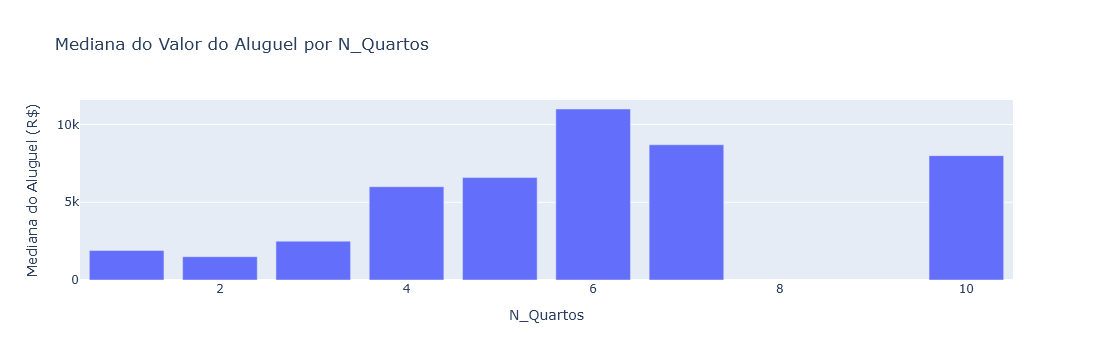

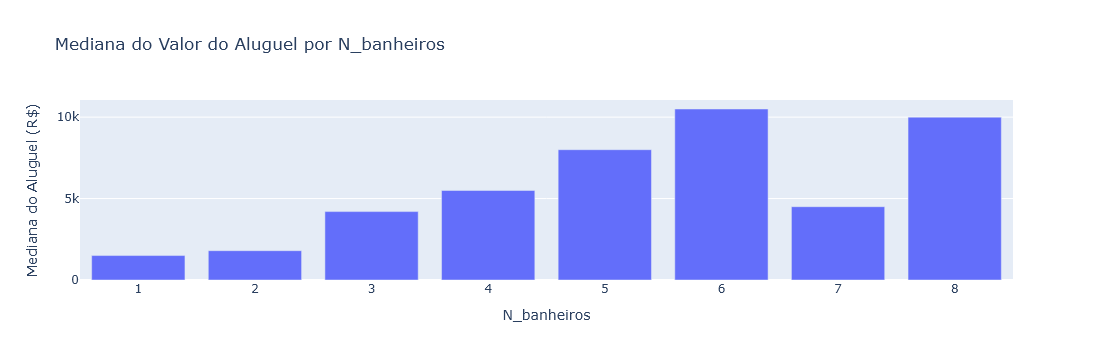

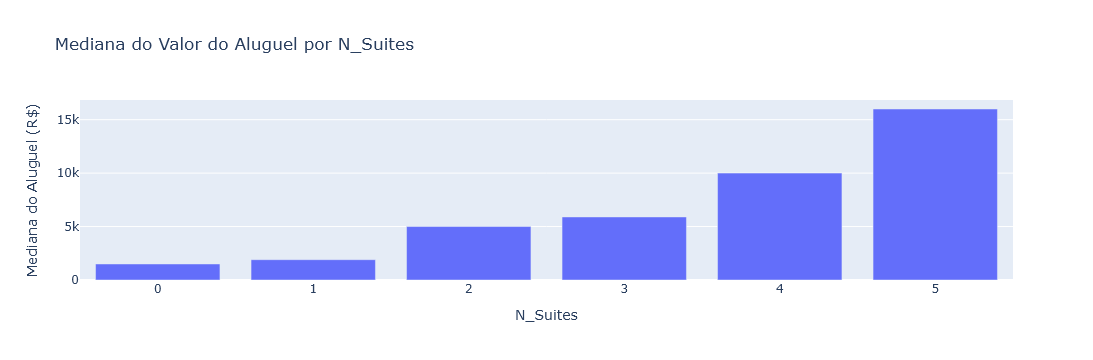

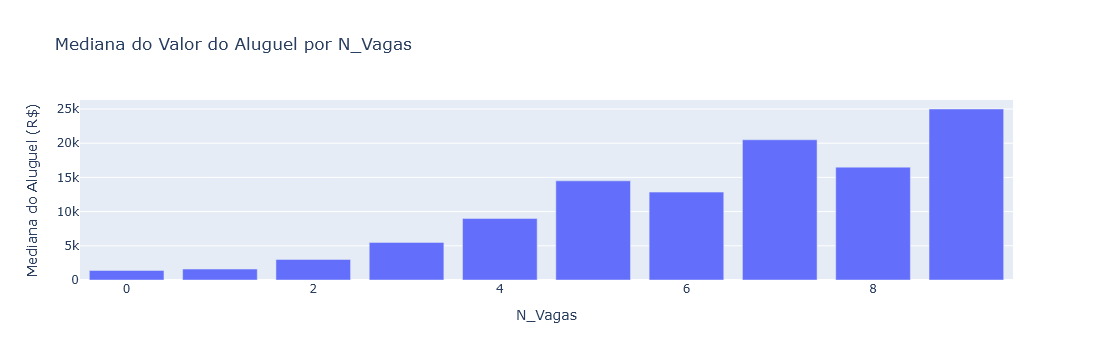

In [327]:
colunas = [
    'N_Quartos', 'N_banheiros', 'N_Suites', 'N_Vagas'
]

for col in colunas:
    if df[col].dtype in ['int64', 'float64']:
        # Agrupa pela variável e calcula a mediana do Valor_Aluguel
        mediana = df.groupby(col)['Valor_Aluguel'].median().reset_index()
        
        fig = px.bar(
            mediana,
            x=col,
            y='Valor_Aluguel',
            title=f'Mediana do Valor do Aluguel por {col}',
            labels={col: col, 'Valor_Aluguel': 'Mediana do Aluguel (R$)'}
        )
        fig.show()

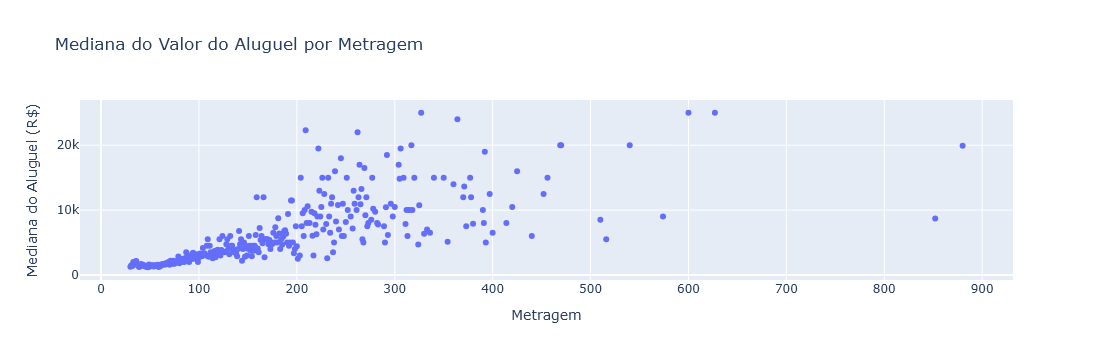

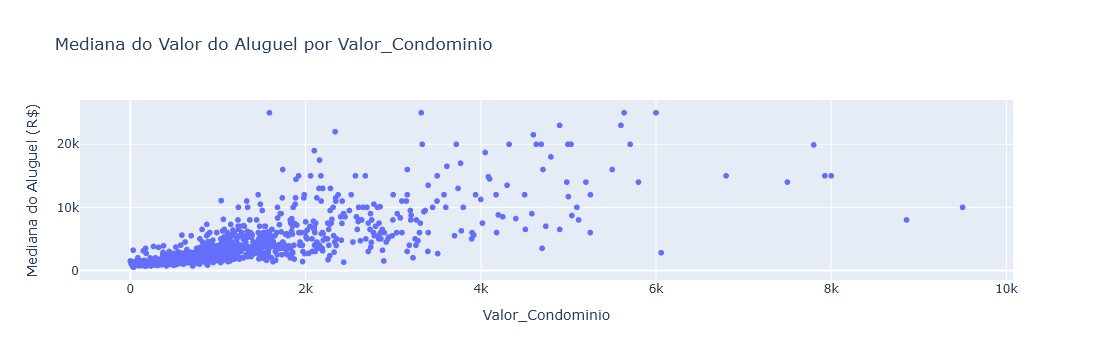

In [328]:
colunas = [
    'Metragem', 'Valor_Condominio'
]

for col in colunas:
    if df[col].dtype in ['int64', 'float64']:
        # Agrupa pela variável e calcula a mediana do Valor_Aluguel
        mediana = df.groupby(col)['Valor_Aluguel'].median().reset_index()
        
        fig = px.scatter(
            mediana,
            x=col,
            y='Valor_Aluguel',
            title=f'Mediana do Valor do Aluguel por {col}',
            labels={col: col, 'Valor_Aluguel': 'Mediana do Aluguel (R$)'}
        )
        fig.show()

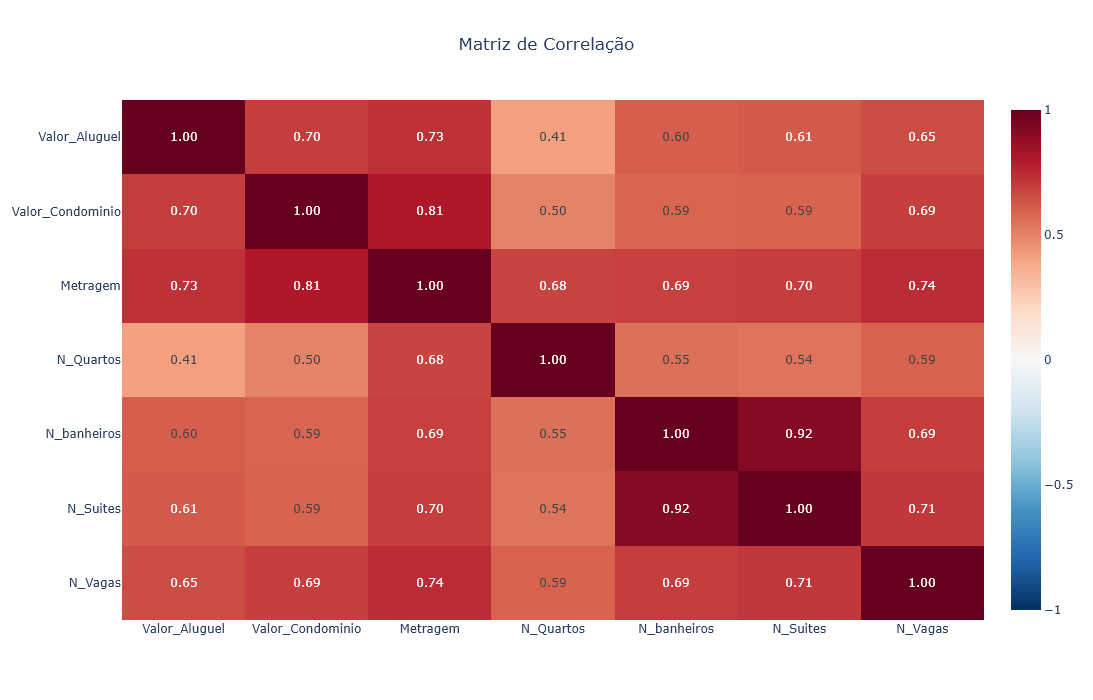

In [329]:
import plotly.express as px

# Selecionando apenas colunas numéricas
numericas = df.select_dtypes(include=['int64', 'float64'])

# Calculando a matriz de correlação
correlacao = numericas.corr()

# Gerando o heatmap
fig = px.imshow(
    correlacao,
    text_auto='.2f',        # Exibe os valores com 2 casas decimais
    color_continuous_scale='RdBu_r',  # Vermelho (positivo) / Azul (negativo)
    zmin=-1, zmax=1,
    title='Matriz de Correlação',
    aspect='auto'
)

fig.update_layout(
    width=800,
    height=700,
    title_x=0.5
)

fig.show()

### Na análise bivariada, gerei graficos de barras, pontos e uma matriz de correlação. Pude identificar que todas as variáveis possuem correlação positiva com o valor do aluguel. Quanto maior o valor da variavél, maior é valor do aluguel.

### Também percebi pela matriz de correlação quais as variaveis que possuem correlações entre si altas. Todas estão bem altas, o menor valor de correlação é 0.41 referente ao numero de quartos e valor do aluguel. A mais alta é 0.92 que é a correlação de número de banheiros com suites. A metragem e condomínio tem uma correlação de 0.81, a segunda mais alta do mapa. Em terceiro temos 0.74, referente a vagas com o número de metragem. 

# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




In [330]:
#Seu código aqui
df.select_dtypes(include=['number']).corr()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
Valor_Aluguel,1.000000,0.695302,0.730591,0.413139,0.603715,0.614397,0.652858
Valor_Condominio,0.695302,1.000000,0.805926,0.497420,0.585795,0.589244,0.690993
Metragem,0.730591,0.805926,1.000000,0.678091,0.687558,0.696281,0.743872
N_Quartos,0.413139,0.497420,0.678091,1.000000,0.553807,0.540887,0.591224
N_banheiros,0.603715,0.585795,0.687558,0.553807,1.000000,0.920149,0.694983
N_Suites,0.614397,0.589244,0.696281,0.540887,0.920149,1.000000,0.712054
N_Vagas,0.652858,0.690993,0.743872,0.591224,0.694983,0.712054,1.000000


### A variável que tem a maior correlação com o target é a variável Metragem, com 0.73.


B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

### Antes de dividir as bases em treino e teste irei aplicar o log no target e criar mais duas copias, uma com o target também em metragem e a outra com o target em metragem e valor do aluguel.

In [331]:
# Primeiro: Excluir colunas desnecessárias
df.drop(columns=['Validacao'], inplace=True)
df.drop(columns=['outlier_metragem'], inplace=True)

In [332]:
import numpy as np

# Copiando o dataset
df1 = df.copy()

# Aplicando o log e criando a nova coluna
df1['Log_Valor_Aluguel'] = np.log(df1['Valor_Aluguel'])

# Excluindo a coluna original
df1.drop(columns=['Valor_Aluguel'], inplace=True)

df1.head()

,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas,Log_Valor_Aluguel
0,295.0,48.0,2,2,1,1,6.173786
1,0.0,50.0,1,2,1,1,6.214608
2,0.0,40.0,1,2,1,1,6.214608
3,36.0,45.0,1,2,1,0,6.214608
4,0.0,30.0,1,1,0,0,6.214608


In [333]:
# Copiando o dataset
df2 = df1.copy()

# Aplicando o log e criando a nova coluna
df2['Log_Metragem'] = np.log(df2['Metragem'])

# Excluindo a coluna original
df2.drop(columns=['Metragem'], inplace=True)

df2.head()

,Valor_Condominio,N_Quartos,N_banheiros,N_Suites,N_Vagas,Log_Valor_Aluguel,Log_Metragem
0,295.0,2,2,1,1,6.173786,3.871201
1,0.0,1,2,1,1,6.214608,3.912023
2,0.0,1,2,1,1,6.214608,3.688879
3,36.0,1,2,1,0,6.214608,3.806662
4,0.0,1,1,0,0,6.214608,3.401197


In [334]:
# Copiando o dataset
df3 = df2.copy()

# Aplicando o log e criando a nova coluna
df3['Log_Valor_Condominio'] = np.log1p(df3['Valor_Condominio']) # Como esta variável possui valores iguais a 0, utilizei o log1p.

# Excluindo a coluna original
df3.drop(columns=['Valor_Condominio'], inplace=True)

df3.head()

,N_Quartos,N_banheiros,N_Suites,N_Vagas,Log_Valor_Aluguel,Log_Metragem,Log_Valor_Condominio
0,2,2,1,1,6.173786,3.871201,5.690359
1,1,2,1,1,6.214608,3.912023,0.000000
2,1,2,1,1,6.214608,3.688879,0.000000
3,1,2,1,0,6.214608,3.806662,3.610918
4,1,1,0,0,6.214608,3.401197,0.000000


### Agora separamos as bases para os 3 casos

In [335]:
# Caso 1 - log apenas no target.
X1 = df1.drop('Log_Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y1 = df1['Log_Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

In [338]:
# Caso 2 - log na metragem e target.
X2 = df2.drop('Log_Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y2 = df2['Log_Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

In [339]:
# Caso 3 - log na metragem, valor do condominio e no target.
X3 = df3.drop('Log_Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y3 = df3['Log_Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [340]:
# Seu código aqui
from sklearn.model_selection import train_test_split

# Separar os dados em conjuntos de treino e teste para caso 1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=42)

In [341]:
# Caso 1 - analisando a separação das bases
print(f"Tamanho de X1_train: {X1_train.shape}" )
print(f"\nTamanho de X1_test: {X1_test.shape}")
print(f"\nTamanho de y1_train: {y1_train.shape}")
print(f"\nTamanho de y1_test: {y1_test.shape}")

Tamanho de X1_train: (5402, 6)

Tamanho de X1_test: (1801, 6)

Tamanho de y1_train: (5402,)

Tamanho de y1_test: (1801,)


In [342]:
# Separar os dados em conjuntos de treino e teste para caso 2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=42)

In [343]:
# Caso 2 - analisando a separação das bases
print(f"Tamanho de X2_train: {X2_train.shape}" )
print(f"\nTamanho de X2_test: {X2_test.shape}")
print(f"\nTamanho de y2_train: {y2_train.shape}")
print(f"\nTamanho de y2_test: {y2_test.shape}")

Tamanho de X2_train: (5402, 6)

Tamanho de X2_test: (1801, 6)

Tamanho de y2_train: (5402,)

Tamanho de y2_test: (1801,)


In [344]:
# Separar os dados em conjuntos de treino e teste para caso 3
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25, random_state=42)

In [345]:
# Caso 3 - analisando a separação das bases
print(f"Tamanho de X3_train: {X3_train.shape}" )
print(f"\nTamanho de X3_test: {X3_test.shape}")
print(f"\nTamanho de y3_train: {y3_train.shape}")
print(f"\nTamanho de y3_test: {y3_test.shape}")

Tamanho de X3_train: (5402, 6)

Tamanho de X3_test: (1801, 6)

Tamanho de y3_train: (5402,)

Tamanho de y3_test: (1801,)


# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [346]:
# Caso 1
X1 = X1_train[['Metragem']]  # Variável independente (características)
y1 = y1_train  # Variável dependente (rótulo)
# se você deu um nome diferente para x train e y train, altere no código.

In [347]:
# Caso 2
X2 = X2_train[['Log_Metragem']]  # Variável independente (características)
y2 = y2_train  # Variável dependente (rótulo)

In [348]:
# Caso 3
X3 = X3_train[['Log_Metragem']]  # Variável independente (características)
y3 = y3_train  # Variável dependente (rótulo)

In [349]:
#Crie seu modelo aqui, usando LinearRegression e as bases de treino.
# Caso 1
imobiliaria_caso_1 = LinearRegression()

imobiliaria_caso_1.fit(X1,y1)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [350]:
# Caso 2
imobiliaria_caso_2 = LinearRegression()

imobiliaria_caso_2.fit(X2,y2)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [351]:
# Caso 3
imobiliaria_caso_3 = LinearRegression()

imobiliaria_caso_3.fit(X3,y3)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [352]:
#Seu código Aqui
imobiliaria_caso_1.intercept_

np.float64(7.014446991717431)

In [251]:
imobiliaria_caso_2.intercept_

np.float64(3.634433295583394)

In [252]:
imobiliaria_caso_3.intercept_

np.float64(3.634433295583394)

In [253]:
imobiliaria_caso_1.coef_

array([0.00797353])

In [254]:
imobiliaria_caso_2.coef_

array([0.94395262])

In [255]:
imobiliaria_caso_3.coef_

array([0.94395262])

Nossa equação seria: 

### Caso 1
**Valor_Aluguel_Caso1 = 7 * (Metragem) + 0.007**

### Caso 2
**Valor_Aluguel_Caso2 = 3.6 * (Metragem) + 0.94**

### Caso 3
**Valor_Aluguel_Caso3 = 3.6 * (Metragem) + 0.94**

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [256]:
#Seu código aqui
imobiliaria_caso_1.score(X1,y1)

0.4992618666988837

In [257]:
imobiliaria_caso_2.score(X2,y2)

0.5169901402553734

In [258]:
imobiliaria_caso_3.score(X3,y3)

0.5169901402553734

D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

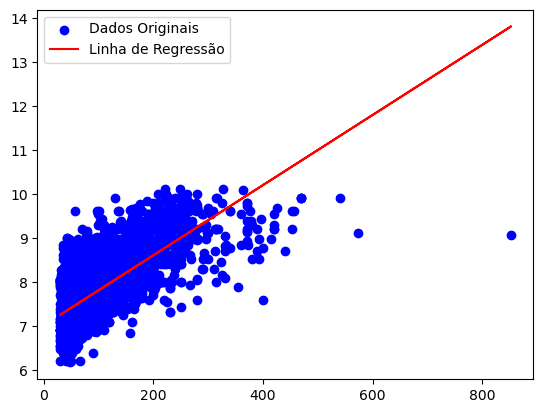

In [259]:
# Seu código aqui
# Gráfico do caso 1
plt.scatter(X1, y1, color='blue', label='Dados Originais')

# Plotar a linha de regressão
plt.plot(X1, imobiliaria_caso_1.predict(X1), color='red', label='Linha de Regressão')
plt.legend()
plt.show()

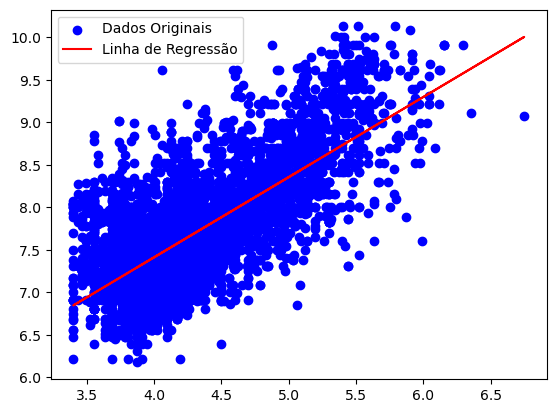

In [260]:
# Gráfico do caso 2
plt.scatter(X2, y2, color='blue', label='Dados Originais')

# Plotar a linha de regressão
plt.plot(X2, imobiliaria_caso_2.predict(X2), color='red', label='Linha de Regressão')
plt.legend()
plt.show()

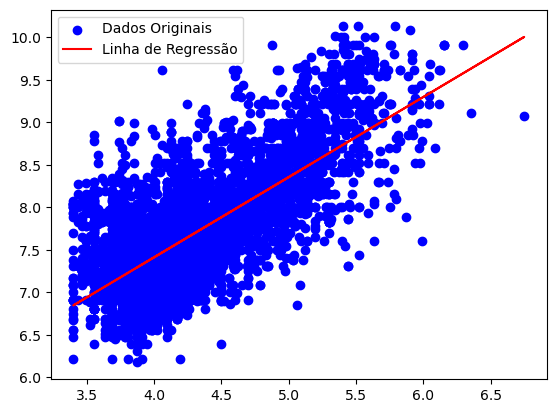

In [261]:
# Gráfico do caso 3
plt.scatter(X3, y3, color='blue', label='Dados Originais')

# Plotar a linha de regressão
plt.plot(X3, imobiliaria_caso_3.predict(X3), color='red', label='Linha de Regressão')
plt.legend()
plt.show()

### O caso 2 e 3 parecem mostrar os mesmos valores, isso pode indicar que não faz diferença inserir ou não o log na variável valor do condominio, mas vou avaliar tudo antes de definir qual dos três casos teremos o melhor resultado. O gráfico está ligeiramente mais compacto nos casos 2 e 3 do que no 1. Acredito que a performace será melhor nos casos 2 e 3.

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [353]:
# Caso 1
X1_test_linear = X1_test[['Metragem']]  # Variável independente (características)
y1_test_linear = y1_test  # Variável dependente (rótulo)

In [354]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes_caso_1_linear = imobiliaria_caso_1.predict(X1_test_linear)

# Avaliando o desempenho do modelo usando métricas como o R²
r2_caso_1_linear = imobiliaria_caso_1.score(X1_test_linear, y1_test_linear)

print("Coeficiente de Determinação (R²) nos Dados de Teste do caso 1:", r2_caso_1_linear)


Coeficiente de Determinação (R²) nos Dados de Teste do caso 1: 0.5044251340357756


In [264]:
# Caso 2
X2_test_linear = X2_test[['Log_Metragem']]  # Variável independente (características)
y2_test_linear = y2_test  # Variável dependente (rótulo)

In [265]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes_caso_2 = imobiliaria_caso_2.predict(X2_test_linear)

# Avaliando o desempenho do modelo usando métricas como o R²
r2_caso_2_linear = imobiliaria_caso_2.score(X2_test_linear, y2_test_linear)

print("Coeficiente de Determinação (R²) nos Dados de Teste do caso 2:", r2_caso_2_linear)

Coeficiente de Determinação (R²) nos Dados de Teste do caso 2: 0.5569529150281104


In [266]:
# Caso 3
X3_test_linear = X3_test[['Log_Metragem']]  # Variável independente (características)
y3_test_linear = y3_test  # Variável dependente (rótulo)

In [267]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes_caso_3 = imobiliaria_caso_3.predict(X3_test_linear)

# Avaliando o desempenho do modelo usando métricas como o R²
r2_caso_3_linear = imobiliaria_caso_3.score(X3_test_linear, y3_test_linear)

print("Coeficiente de Determinação (R²) nos Dados de Teste do caso 2:", r2_caso_3_linear)

Coeficiente de Determinação (R²) nos Dados de Teste do caso 2: 0.5569529150281104


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

Escreva sua resposta aqui. **A diferença do R2 da base de treinamento e de teste é pequena, somente um pouco maior no teste, mas não acredito que esse valor signifique um problema no modelo. Após analisar os três casos, pude confirmar que o melhor resultado se dá nos casos 2 e 3, tendo esses dois resultados identicos. A aplicação do log na variável Metragem e no target devolve o melhor resultado e incluir o log no valor do condominio até o momento não resulta em nenhuma diferença significativa.**

# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [355]:
#seu código aqui
# Caso 1
X1 = X1_train[
    [
        'Metragem',
        'N_Quartos',
        'N_Suites',
        'N_Vagas',
        'N_banheiros',
        'Valor_Condominio'
    ]]
y1 = y1_train 

In [356]:
# Caso 2
X2 = X2_train[
    [
        'Log_Metragem',
        'N_Quartos',
        'N_Suites',
        'N_Vagas',
        'N_banheiros',
        'Valor_Condominio'
    ]]
y2 = y2_train

In [357]:
# Caso 3
X3 = X3_train[
    [
        'Log_Metragem',
        'N_Quartos',
        'N_Suites',
        'N_Vagas',
        'N_banheiros',
        'Log_Valor_Condominio'
    ]]
y3 = y3_train 

B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [358]:
#seu código aqui
# Caso 1
imobiliaria_caso_1 = LinearRegression()

imobiliaria_caso_1.fit(X1,y1)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [359]:
# Caso 2
imobiliaria_caso_2 = LinearRegression()

imobiliaria_caso_2.fit(X2,y2)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [360]:
# Caso 3
imobiliaria_caso_3 = LinearRegression()

imobiliaria_caso_3.fit(X3,y3)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


C) Traga o valor do R quadrado e avalie o valor encontrado.

In [361]:
#seu código aqui
imobiliaria_caso_1.score(X1,y1)

0.5760674199295748

In [362]:
imobiliaria_caso_2.score(X2,y2)

0.6151221646201934

In [363]:
imobiliaria_caso_3.score(X3,y3)

0.606656409926593

D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [364]:
#seu código aqui
# Caso 1
X1_test = X1_test[
    [
        'Metragem',
        'N_Quartos',
        'N_Suites',
        'N_Vagas',
        'N_banheiros',
        'Valor_Condominio'
    ]] 
y1_test = y1_test  

In [365]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes_caso_1 = imobiliaria_caso_1.predict(X1_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2_caso_1 = imobiliaria_caso_1.score(X1_test, y1_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste do caso 1:", r2_caso_1)

Coeficiente de Determinação (R²) nos Dados de Teste do caso 1: 0.5850228207102253


In [368]:
# Caso 2
X2_test = X2_test[
    [
        'Log_Metragem',
        'N_Quartos',
        'N_Suites',
        'N_Vagas',
        'N_banheiros',
        'Valor_Condominio'
    ]] 
y2_test = y2_test  

In [369]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes_caso_2 = imobiliaria_caso_2.predict(X2_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2_caso_2 = imobiliaria_caso_2.score(X2_test, y2_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste do caso 1:", r2_caso_2)

Coeficiente de Determinação (R²) nos Dados de Teste do caso 1: 0.6392935994582374


In [370]:
# Caso 3
X3_test = X3_test[
    [
        'Log_Metragem',
        'N_Quartos',
        'N_Suites',
        'N_Vagas',
        'N_banheiros',
        'Log_Valor_Condominio'
    ]] 
y3_test = y3_test  

In [371]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes_caso_3 = imobiliaria_caso_3.predict(X3_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2_caso_3 = imobiliaria_caso_3.score(X3_test, y3_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste do caso 1:", r2_caso_3)

Coeficiente de Determinação (R²) nos Dados de Teste do caso 1: 0.6317963234221449


E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

Digite sua resposta aqui **A multipla tem um R2 maior que a linear para os 3 casos e isso faz sentido já que todas as variáveis estão relacionadas ao target. O caso que se mostrou mais estavel foi o caso 2, onde é aplicado o log em Metragem e no target tanto na regressão linear quanto na múltipla.**